# Vocabulary

In this curent notebook, we will extract the 50 mosts frequents word by categories and subcategories.



## Imports :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

## Other library related actions :

In [2]:
nlp = spacy.load('en_core_web_sm')

/home/mari/miniconda3/lib/python3.10/site-packages/spacy/util.py:877: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.5.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


## Préprocessing :

We use the dataframe with the whole text of each wikipedia page that we scrapped in the "Scrapping writers and astronauts" notebook. We join every text by category and subcategory in the cat_text and suc_cat_text dictionnaries for the worldclouds. The 50 most frequents words need a list of tokens that we find in the preprocess() function with the help of the Spacy library. We filter all the blank characters like '\n' and the words of three characters or less to find relevant words and not having 'the' has the most frequent words each time. Even if some useless words like 'also', 'that' or 'with' have 4 letters, filtering them will take away import words like 'nasa' or 'crew' so we choose to keep them.

In [3]:
# We open the dataframe
df = pd.read_csv("df_with_texts.csv")
df.head(5)

,Unnamed: 0,Person,Subcategory,Category,Text
0,104,Jeanette Epps,American astronauts,Astronauts,"Jeanette Jo Epps (born November 3, 1970) is an..."
1,288,Sergey Avdeev,Russian cosmonauts,Astronauts,Sergei Vasilyevich Avdeyev (Сергей Васильевич ...
2,198,Matthias Maurer,German astronauts,Astronauts,Matthias Josef Maurer (born 18 March 1970) is ...
3,365,Andriyan Nikolayev,Soviet cosmonauts,Astronauts,Andriyan Grigoryevich Nikolayev (Chuvash and R...
4,412,Gennady Manakov,Soviet cosmonauts,Astronauts,Gennady Mikhailovich Manakov (Russian: Геннади...


In [4]:
# We retrieve the lists of categories and subcategories
cat = df.Category.unique()
sub_cat = df.Subcategory.unique()
len(cat), len(sub_cat)

(2, 115)

In [5]:
# We join all texts by categories
cat_txt = {}
for c in cat:
    cat_txt[c] = df[df['Category']==c].Text.str.cat(sep=' ')

len(cat_txt)

2

In [6]:
# We join all texts by subcategories
sub_cat_txt = {}
for c in sub_cat:
    sub_cat_txt[c] = df[df['Subcategory']==c].Text.str.cat(sep=' ')

len(sub_cat_txt)

115

In [8]:
def preprocess(s:str)->str:
    """
    A little fonction containing all text preprocessing :
        -> all words in lower text
        -> tokenization with spacy
        -> filtering of all short words
        -> taking away blank characters with the regex library
    """
    doc = nlp(s.lower())
    #tokens = [token.orth_ for token in doc if ((len(token.orth_) > 3) and not (bool(re.search(r'\s',token.orth_))))]
    tokens = [token.orth_ for token in doc if (token.is_stop != True and token.is_punct != True)and not (bool(re.search(r'\s',token.orth_)))]
    return tokens

d = {'a':"AI JEZIUFH I URES \n\n\n\n", 'b':"sjds fhiuds", 'c':"Apple APPLE apple", 'd':"This is a quite complexe sentences to test it the sentences do what the building are suppose to dance, amen."}
for k,v in d.items():
    d[k] = preprocess(v)

d

{'a': ['ai', 'jeziufh', 'ures'],
 'b': ['sjds', 'fhiuds'],
 'c': ['apple', 'apple', 'apple'],
 'd': ['complexe',
  'sentences',
  'test',
  'sentences',
  'building',
  'suppose',
  'dance',
  'amen']}

In [9]:
# We join all tokens by categories
cat_token = {}
for c in cat:
    tmp = []
    for i in df[df['Category']==c].Text:
        tmp.extend(preprocess(i))
    cat_token[c] = tmp
len(cat_token)

2

In [10]:
# We join all tokens by subcategories
sub_cat_token = {}
for c in sub_cat:
    tmp = []
    for i in df[df['Subcategory']==c].Text:
        tmp.extend(preprocess(i))
    sub_cat_token[c] = tmp
len(sub_cat_token)

115

## 50 most frequents words

In [11]:
# we find the 50 most frequents words by categories 
output = ""

for k,v in cat_token.items(): # for each categories
    tmp = np.array(v)
    unique, counts = np.unique(tmp, return_counts=True) # We count the number of occurences by tokens
    tmp_df = pd.DataFrame({'token': unique, 'counts': list(counts)}, columns=["token", "counts"])
    freq_50 = list(tmp_df.sort_values(by="counts", ascending=False).token.head(50)) # we sort by number of occurences and take the 50 first words
    output += f"The 50 most frequents word of the subcategory \"{k}\" :\n{freq_50}\n\n"

with open("50_most_frequents_words_by_category.txt", "w") as text_file: # we save the output
    text_file.write(output)

"List saved in 50_most_frequents_words_by_category.txt"

'List saved in 50_most_frequents_words_by_category.txt'

In [12]:
# we find the 50 most frequents words by subcategories 
output = ""

for k,v in sub_cat_token.items(): # for each subcategories
    tmp = np.array(v)
    unique, counts = np.unique(tmp, return_counts=True) # We count the number of occurences by tokens
    tmp_df = pd.DataFrame({'token': unique, 'counts': list(counts)}, columns=["token", "counts"])
    freq_50 = list(tmp_df.sort_values(by="counts", ascending=False).token.head(50)) # we sort by number of occurences and take the 50 first words
    output += f"The 50 most frequents word of the subcategory \"{k}\" :\n{freq_50}\n\n"

with open("50_most_frequents_words_by_subcategory.txt", "w") as text_file: # we save the output
    text_file.write(output)

"List saved in 50_most_frequents_words_by_subcategory.txt"

'List saved in 50_most_frequents_words_by_subcategory.txt'

## Wordclouds

This task use the library WordCloud. This library do its own preprocessing so we don't exactly find the same words. We can still see that most word are the same in both the wordclouds and our own list. They seems to have less useless words like 'also', 'from', 'with' ot 'that' whithout loosing small important words like 'ST', 'ISS' or 'one'

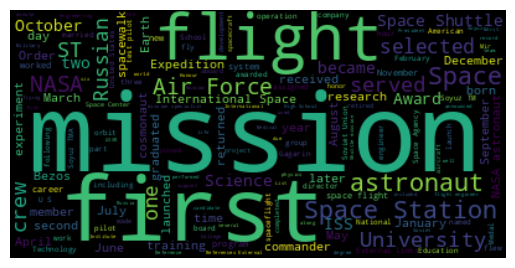

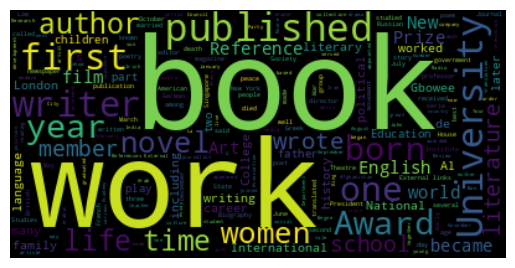

In [13]:
for k,v in cat_txt.items(): # for each categories 
    wordcloud = WordCloud().generate(v) # we generate the worldcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show() # we show it
    wordcloud.to_file("Viz/wc_by_cat/wc_"+k+".jpg") # and we save it

In [14]:
for k,v in sub_cat_txt.items(): # for each subcategories 
    wordcloud = WordCloud().generate(v) # we generate the worldcloud
    wordcloud.to_file("Viz/wc_by_sub_cat/wc_"+k+".jpg") # and we save it

# nb : we didnt show all 115 subcategories wordclouds to save space